In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv('BostonHousing.csv')

In [3]:
df.head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [4]:
print(df.isnull().sum())

crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


In [5]:
print(df.describe())

             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  501.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284341   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.705587   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.884000   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208000   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.625000   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio           b  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [6]:
df = df.dropna()

In [7]:
print(df.isnull().sum())

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


In [8]:
print(df.isnull().sum())

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


In [9]:
X = df.drop('medv', axis=1)
y = df['medv']

In [10]:
corr = df.corr()
corr.shape

(14, 14)

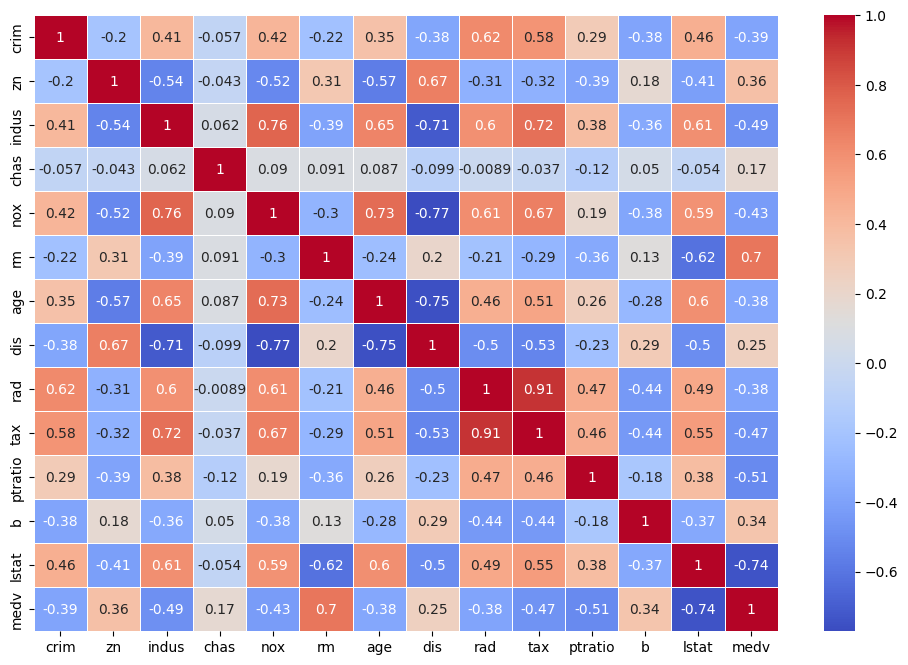

In [11]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

In [12]:
x = df[['rm','ptratio','lstat']]
y = df['medv']

In [13]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest =train_test_split(x, y, test_size =0.2,random_state = 2)

In [14]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model=lm.fit(xtrain,ytrain)

In [15]:
xtrain

,rm,ptratio,lstat
496,5.390,19.2,21.14
55,7.249,17.9,4.81
341,7.241,15.5,5.49
159,6.510,14.7,7.39
398,5.453,20.2,30.59
...,...,...,...
23,5.813,21.0,19.88
75,6.286,18.7,8.94
498,6.019,19.2,12.92
16,5.935,21.0,6.58


In [16]:
ytrain_pred=lm.predict(xtrain)
ytest_pred=lm.predict(xtest)

In [17]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [18]:
testdata=[[6.575,15.3,4.98]]

In [19]:
test_pred = lm.predict(testdata)
test_pred

C:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([31.17744056])

In [20]:
df1=pd.DataFrame(ytrain_pred,ytrain)
df2=pd.DataFrame(ytest_pred,ytest)

In [21]:
df1

,0
medv,
19.7,12.843707
35.4,32.020235
32.7,33.626917
23.3,29.945748
5.0,6.543438
...,...
14.5,13.926973
21.4,24.599352
21.2,20.587343


In [22]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(ytest, ytest_pred)
print('MSE on test data:',mse)
mse1 = mean_squared_error(ytrain_pred, ytrain)
print('MSE on training data:',mse1)

MSE on test data: 22.73352585917888
MSE on training data: 28.513175868157088


In [23]:
r2 = lm.score(xtest, ytest)
rmse = (np.sqrt(mean_squared_error(ytest, ytest_pred)))
print('r-squared: {}' .format(r2))
print('-----------------------------------------')
print('root mean squared error: {}'.format(rmse))

r-squared: 0.703441612136131
-----------------------------------------
root mean squared error: 4.767968735130179


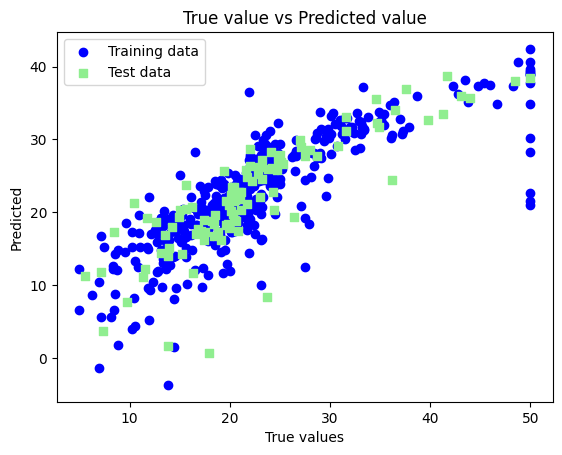

In [24]:
plt.scatter(ytrain ,ytrain_pred,c='blue',marker='o',label='Training data')
plt.scatter(ytest,ytest_pred ,c='lightgreen',marker='s',label='Test data')
plt.xlabel('True values')
plt.ylabel('Predicted')
plt.title("True value vs Predicted value")
plt.legend(loc= 'upper left') #plt.hlines(y=0,xmin=0,xmax=50)
plt.plot()
plt.show()

In [ ]:
# crim     : Crime rate in the area
# zn       : Amount of land for big houses
# indus    : Amount of land for factories or businesses
# chas     : 1 if near Charles River, else 0
# nox      : Air pollution level (nitric oxide)
# rm       : Average number of rooms in houses
# age      : % of old houses (built before 1940)
# dis      : Distance to work centers
# rad      : Access to highways (higher = better access)
# tax      : Property tax rate
# ptratio  : Number of students per teacher
# b        : A measure related to Black population
# lstat    : % of people with low income
# medv     : Median house price (in $1000s)
